In [138]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [139]:

iris_df = pd.read_csv('Data/iris.data')


In [140]:
iris_df.head(100)


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
95,5.7,2.9,4.2,1.3,Iris-versicolor
96,6.2,2.9,4.3,1.3,Iris-versicolor
97,5.1,2.5,3.0,1.1,Iris-versicolor
98,5.7,2.8,4.1,1.3,Iris-versicolor


In [141]:
iris_df = iris_df.rename(columns={
    '5.1': 'sepal_length',
    '3.5': 'sepal_width',
    '1.4': 'petal_length',
    '0.2': 'petal_width',
    'Iris-setosa': 'species'  # O cambia el nombre de la columna 'species' si deseas
})

In [ ]:
iris_df.head(50)


,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [143]:
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])


In [144]:
variables = iris_df[['petal_length', 'sepal_width','petal_length','petal_width']]
objective = iris_df['species']

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
objective_encoded = encoder.fit_transform(objective.values.reshape(-1, 1))

In [146]:
X_train, X_test, y_train, y_test = train_test_split(variables, objective_encoded, test_size=0.3, random_state=1)

In [147]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Implementar Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,         
    restore_best_weights=True 
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping] 
)

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3625 - loss: 1.8018 - val_accuracy: 0.2857 - val_loss: 1.5445
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3430 - loss: 1.7146 - val_accuracy: 0.2857 - val_loss: 1.4560
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3547 - loss: 1.6075 - val_accuracy: 0.2857 - val_loss: 1.3808
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3899 - loss: 1.5381 - val_accuracy: 0.2857 - val_loss: 1.3184
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3664 - loss: 1.4509 - val_accuracy: 0.2857 - val_loss: 1.2632
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3821 - loss: 1.5029 - val_accuracy: 0.2857 - val_loss: 1.2200
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3725 - loss: 1.3974 - val_accuracy: 0.3333 - val_loss: 1.1822
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4136 - loss: 1.3450 - val_accuracy: 0.3333 - val_loss:

In [150]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.2581
Precisión en el conjunto de prueba: 100.00%


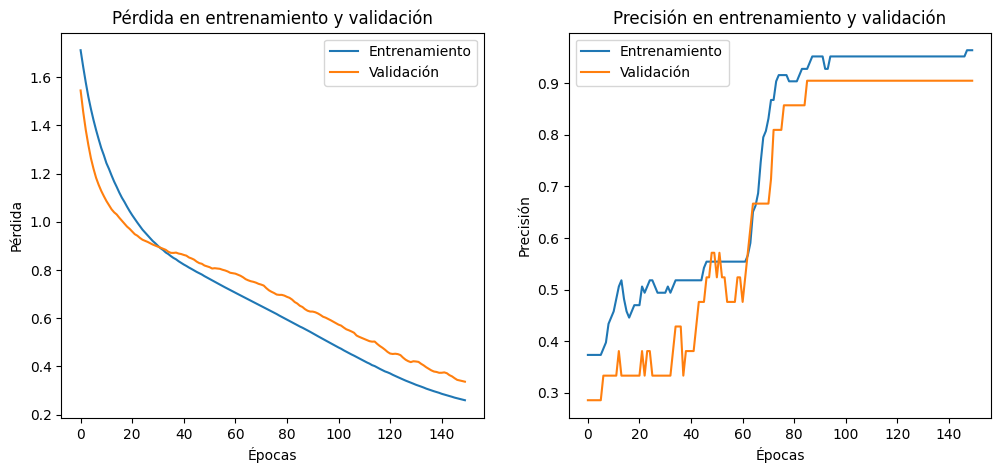

In [ ]:

plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida en entrenamiento y validación')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión en entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.4,3.9,1.7,0.4]
])

predictions = model.predict(new_samples)

class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

for i, sample in enumerate(new_samples):
    print(f"\nValores de entrada: {sample}")
    print(f"Probabilidades de cada clase: {np.round(predictions[i], 3)}")
    predicted_class = np.argmax(predictions[i])
    print(f"Clase predicha: {predicted_class} ({class_names[predicted_class]})")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Valores de entrada: [5.1 3.5 1.4 0.2]
Probabilidades de cada clase: [0.934 0.066 0.   ]
Clase predicha: 0 (Iris-setosa)

Valores de entrada: [6.2 3.4 5.4 2.3]
Probabilidades de cada clase: [0.007 0.523 0.47 ]
Clase predicha: 1 (Iris-versicolor)

Valores de entrada: [5.4 3.9 1.7 0.4]
Probabilidades de cada clase: [0.926 0.073 0.   ]
Clase predicha: 0 (Iris-setosa)
